In [284]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [246]:
# Defining today's day for reference
today = '2016-06-20'
date = pd.to_datetime(today)
date

Timestamp('2016-06-20 00:00:00')

In [268]:
# Loading csv extracted from database into a Pandas DataFrame
df = pd.read_csv('dataset.csv', usecols=range(1,17))

In [269]:
# Treating date fields and converting them to datetime timestamp
df.created_at = pd.to_datetime(df['created_at'])
df.last_session = pd.to_datetime(df['last_session'])
df.last_favorited_artwork_date = pd.to_datetime(df['last_favorited_artwork_date'])
df.last_followed_artist_date = pd.to_datetime(df['last_followed_artist_date'])

In [249]:
# Creating function to extract only the days (int) from TimeDelta objects
def extract_days(x):
    try:
        return x.days
    except:
        return 0

In [270]:
# New feature: Extracting the difference between last session and today
df['days_from_last_session'] = date - df.last_session
df['days_from_last_session'] = df.days_from_last_session.apply(lambda x: extract_days(x))

In [271]:
# New feature: Extracting the difference between last session and when user registered
df['diff_created_to_last'] = df.last_session - df.created_at
df['diff_created_to_last'] = df.diff_created_to_last.apply(lambda x: extract_days(x))

In [272]:
# New feature: Extracting the difference between last favorited artwork and today
df['diff_last_fav_artwork_to_today'] = date - df.last_favorited_artwork_date
df['diff_last_fav_artwork_to_today'] = df.diff_last_fav_artwork_to_today.apply(lambda x: extract_days(x))

In [273]:
# New feature: Extracting the difference between last artists followed and today
df['diff_last_artist_folw_to_today'] = date - df.last_followed_artist_date
df['diff_last_artist_folw_to_today'] = df.diff_last_artist_folw_to_today.apply(lambda x: extract_days(x))

In [274]:
df.head(10)

,id,last_sign_in_at,created_at,last_session,num_sessions,total_artists_followed,total_artworks_favorited,total_artworks_shared,total_follows,total_favorites,last_favorited_artwork_date,last_followed_artist_date,city,gender,user_type,os,days_from_last_session,diff_created_to_last,diff_last_fav_artwork_to_today,diff_last_artist_folw_to_today
0,10002.0,2014-05-11,2014-05-11,2015-08-01,1.0,0.0,2.0,0.0,0.0,2.0,NaT,NaT,Arlington Heights,NaN,NaN,iPhone OS,324,447,0,0
1,10006.0,NaN,2014-05-11,2016-02-28,9.0,0.0,3.0,0.0,0.0,3.0,NaT,NaT,Elizabeth,male,NaN,iPhone OS,113,658,0,0
2,10013.0,NaN,2014-05-11,2015-06-06,2.0,0.0,1.0,0.0,NaN,NaN,NaT,NaT,Philadelphia,NaN,Logged in with FB,iPhone OS,380,391,0,0
3,10045.0,2014-05-11,2014-05-11,2016-03-16,49.0,0.0,13.0,0.0,NaN,NaN,NaT,NaT,Jersey City,NaN,NaN,iPhone OS,96,675,0,0
4,10071.0,2014-05-11,2014-05-11,2016-04-17,2.0,0.0,2.0,0.0,NaN,NaN,NaT,NaT,San Antonio,NaN,Organic,iPhone OS,64,707,0,0
5,10163.0,2016-02-27,2014-05-11,2016-02-26,1.0,0.0,8.0,0.0,0.0,8.0,NaT,NaT,Barcelona,male,NaN,iPhone OS,115,656,0,0
6,102.0,2016-06-16,2013-02-01,2016-05-17,56.0,33.0,41.0,8.0,30.0,39.0,2016-05-01,2016-05-01,Lynchburg,female,Organic,iPhone OS,34,1201,50,50
7,10211.0,NaN,2014-05-11,2016-03-31,1.0,1.0,3.0,0.0,NaN,NaN,NaT,NaT,Denver,NaN,Organic,iPhone OS,81,690,0,0
8,10272.0,NaN,2014-05-12,2015-03-17,1.0,0.0,0.0,0.0,NaN,NaN,NaT,NaT,Huntington Beach,NaN,Logged in with FB,iPhone OS,461,309,0,0
9,10312.0,NaN,2014-05-12,2015-12-20,2.0,0.0,0.0,0.0,NaN,NaN,NaT,NaT,New York,NaN,Logged in with email,iPhone OS,183,587,0,0


In [275]:
drop_cols = ['id', 
             'last_sign_in_at', 
             'created_at', 
             'last_session', 
             'last_favorited_artwork_date', 
             'last_followed_artist_date',
             'total_follows',
             'total_favorites',
             'city']

In [276]:
df = df.drop(drop_cols, axis=1)

In [277]:
df.head()

,num_sessions,total_artists_followed,total_artworks_favorited,total_artworks_shared,gender,user_type,os,days_from_last_session,diff_created_to_last,diff_last_fav_artwork_to_today,diff_last_artist_folw_to_today
0,1.0,0.0,2.0,0.0,NaN,NaN,iPhone OS,324,447,0,0
1,9.0,0.0,3.0,0.0,male,NaN,iPhone OS,113,658,0,0
2,2.0,0.0,1.0,0.0,NaN,Logged in with FB,iPhone OS,380,391,0,0
3,49.0,0.0,13.0,0.0,NaN,NaN,iPhone OS,96,675,0,0
4,2.0,0.0,2.0,0.0,NaN,Organic,iPhone OS,64,707,0,0


In [278]:
# Filling NaN values with unknown for categorical variables before dummifying
df.gender.fillna('unknown', inplace=True)
df.user_type.fillna('unknown', inplace=True)
df.os.fillna('unknown', inplace=True)

# Dropping about 100 recent user ids missing all information
df.num_sessions.dropna(inplace=True)

In [242]:
# Top Cities
df.city.value_counts()[:50]

New York           2106
Los Angeles        1447
San Francisco      1292
Chicago            1160
Houston             983
Brooklyn            906
Dallas              774
Miami               727
Denver              541
Austin              538
Atlanta             534
Seattle             513
Washington          481
Philadelphia        462
Fort Lauderdale     408
Oakland             382
Portland            374
The Bronx           369
San Jose            350
San Diego           344
Phoenix             334
Las Vegas           296
Minneapolis         294
San Antonio         288
Charlotte           261
Orlando             259
Boston              241
Arlington           239
Salt Lake City      224
Nashville           199
Baltimore           197
Columbus            196
Sacramento          190
Tampa               184
Long Beach          176
Richmond            175
Jersey City         174
Kansas City         160
Baton Rouge         157
Hollywood           137
Marietta            137
Alexandria      

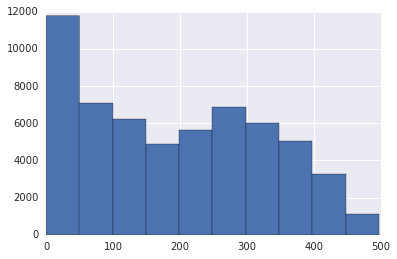

In [315]:
df.days_from_last_session.hist()

In [341]:
colors = np.where(df.engagement200 == 1, 'b','r')

In [342]:
df.drop('diff_last_fav_artwork_to_today', axis=1, inplace=True)
df.drop('diff_last_artist_folw_to_today', axis=1, inplace=True)
df.drop('diff_created_to_last', axis=1, inplace=True)

In [343]:
df.columns

Index([u'num_sessions', u'total_artists_followed', u'total_artworks_favorited',
       u'total_artworks_shared', u'gender', u'user_type', u'os',
       u'days_from_last_session', u'engagement200', u'engagement15',
       u'engagement_now15'],
      dtype='object')

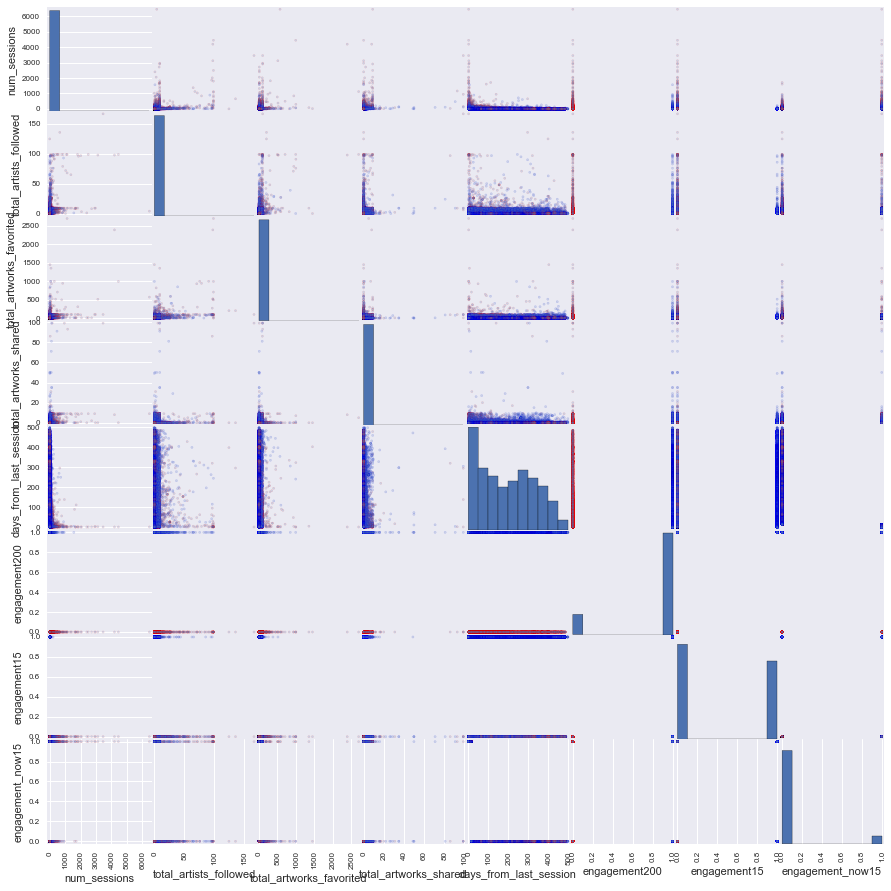

In [344]:
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='hist', color=colors);

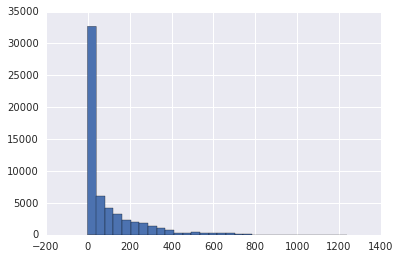

In [317]:
# Lifetime engagement of a customer (distribution of users)
df.diff_created_to_last.hist(bins=30)

(0, 50000)

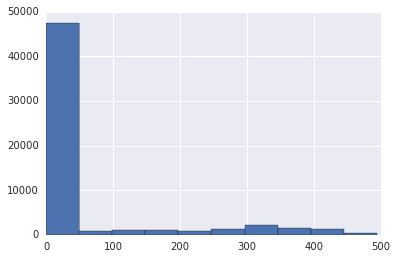

In [318]:
df.diff_last_artist_folw_to_today.hist(bins=10)
plt.ylim(0,50000)

In [335]:
df['engagement200'] = np.where(df.diff_created_to_last < 200, 1, 0)
df['engagement15'] = np.where(df.diff_created_to_last < 15, 1, 0)
df['engagement_now15'] = np.where(df.days_from_last_session < 15, 1, 0)

In [336]:
df.engagement15.value_counts()

0    31718
1    26213
Name: engagement15, dtype: int64

In [337]:
df.engagement200.value_counts()

1    48329
0     9602
Name: engagement200, dtype: int64

In [338]:
df.engagement_now15.value_counts()

0    53460
1     4471
Name: engagement_now15, dtype: int64